In [12]:
import requests
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_excel('helsinki_plants.xlsx')

In [14]:
df = df.sort_values(by='Carbon intensity (kg CO2eq/MWh)')

In [15]:
df['Cumulative heat capacity (MW)'] = df['Heat capacity (MW)'].cumsum()

In [16]:
df['Mean carbon intensity (kg CO2eq/MWh)'] = ((df['Carbon intensity (kg CO2eq/MWh)']*df['Heat capacity (MW)']).cumsum()/df['Cumulative heat capacity (MW)']).shift(1).bfill()

In [17]:
df

,Unit,Unit type,Main fuel,Comissioning year,Planned decomissioning/conversion year,Heat capacity (MW),Carbon intensity (kg CO2eq/MWh),Cumulative heat capacity (MW),Mean carbon intensity (kg CO2eq/MWh)
4,Salmisaari,HOB,Pellet,2018,NaN,90,50.0,90,50.000000
2,Vuosaari A,CHP-CCGT,Natural gas,1991,NaN,170,500.0,260,50.000000
3,Vuosaari B,CHP-CCGT,Natural gas,1998,NaN,430,500.0,690,344.230769
7,Vuosaari,HOB,Natural gas,1986,NaN,120,500.0,810,441.304348
11,Lassila,HOB,Natural gas,1977,NaN,235,500.0,1045,450.000000
12,Patola,HOB,Natural gas,1982,NaN,230,500.0,1275,461.244019
14,Myllypuro,HOB,Natural gas,1978,NaN,240,500.0,1515,468.235294
8,Alppila,HOB,Light fuel oil,1964,NaN,165,600.0,1680,473.267327
6,Hanasaari,HOB,Heavy fuel oil,2009,NaN,280,800.0,1960,485.714286
9,Munkkisaari,HOB,Heavy fuel oil,1969,NaN,235,800.0,2195,530.612245


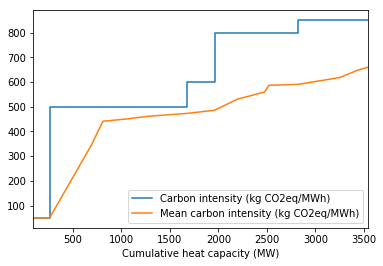

In [18]:
ax = df.plot(x='Cumulative heat capacity (MW)', y='Carbon intensity (kg CO2eq/MWh)', drawstyle="steps-post")
df.plot(x='Cumulative heat capacity (MW)', y='Mean carbon intensity (kg CO2eq/MWh)', ax=ax)

In [19]:
finterp = interp1d(df['Cumulative heat capacity (MW)'], df['Mean carbon intensity (kg CO2eq/MWh)'])

In [20]:
eta = 0
demand = df_heat['Hourly district heating power']
demand_mean = df_heat['Hourly district heating power'].mean()
demand = demand*(1-eta)+eta*demand_mean

NameError: name 'df_heat' is not defined

In [21]:
(demand.apply(finterp)*demand).mean()

NameError: name 'demand' is not defined

In [22]:
def calculate_emissions(df, eta=0): 
    demand = df_heat['Hourly district heating power']
    demand_mean = df_heat['Hourly district heating power'].mean()
    demand = demand*(1-eta)+eta*demand_mean
    
    emission_intensity = demand.apply(finterp) # [kg CO2eq /MW]
    emission = emission_intensity*demand/10**9 # [Mega tonnes CO2eq]
    
    return emission

In [23]:
import numpy as np
emissions = [calculate_emissions(df_heat, i).sum() for i in np.arange(0,1.1,0.1)]

NameError: name 'df_heat' is not defined

In [24]:
(emissions[0]-min(emissions))/emissions[0]

NameError: name 'emissions' is not defined

In [25]:
(emissions[0]-min(emissions))*(10**6)

NameError: name 'emissions' is not defined

In [26]:
emissions[0]

NameError: name 'emissions' is not defined

In [27]:
min(emissions)

NameError: name 'emissions' is not defined

In [28]:
df_heat = pd.read_csv('export_hki_dh_2016_en.csv', sep=';', decimal=',', index_col=0)
df_heat.index = pd.to_datetime(df_heat.index, format='%d.%m.%Y %H:%M')
df_heat = df_heat.loc[~df_heat.index.duplicated(keep='first')]
df_heat['Mean carbon emissions [kg CO2eq /MW]'] = df_heat['Hourly district heating power'].apply(finterp)
df_heat['Carbon emissions [tonnes CO2eq]'] = df_heat['Mean carbon emissions [kg CO2eq /MW]']*df_heat['Hourly district heating power']/1000

In [29]:
df_heat['Carbon emissions [tonnes CO2eq]'].sum()/10**6

3.021883807784363

In [30]:
df_heat.head()

,Hourly district heating power,Mean carbon emissions [kg CO2eq /MW],Carbon emissions [tonnes CO2eq]
timestamp,,,
2016-01-01 00:00:00,1339.30,463.117098,620.252730
2016-01-01 01:00:00,1346.96,463.340236,624.100765
2016-01-01 02:00:00,1312.83,462.346019,606.981724
2016-01-01 03:00:00,1280.60,461.407149,590.877995
2016-01-01 04:00:00,1274.66,461.227398,587.908115


In [31]:
df_temp = pd.read_csv('csv-9cc99367-478a-4abc-8cd5-552171e2e275.csv')
df_temp['datetime'] = df_temp['Year'].astype(str)+'-'+df_temp['m'].astype(str)+'-'+df_temp['d'].astype(str)+' '+df_temp['Time'].astype(str)
df_temp.index = pd.to_datetime(df_temp['datetime'], utc=True)
df_temp = df_temp.drop(columns=['Year', 'm', 'd', 'Time', 'Time zone', 'datetime'])
df_temp = df_temp.tz_convert(tz='Europe/Helsinki').tz_localize(None)
df_temp = df_temp.loc[~df_temp.index.duplicated(keep='first')]

In [32]:
df_heat = pd.concat([df_heat, df_temp], axis=1)

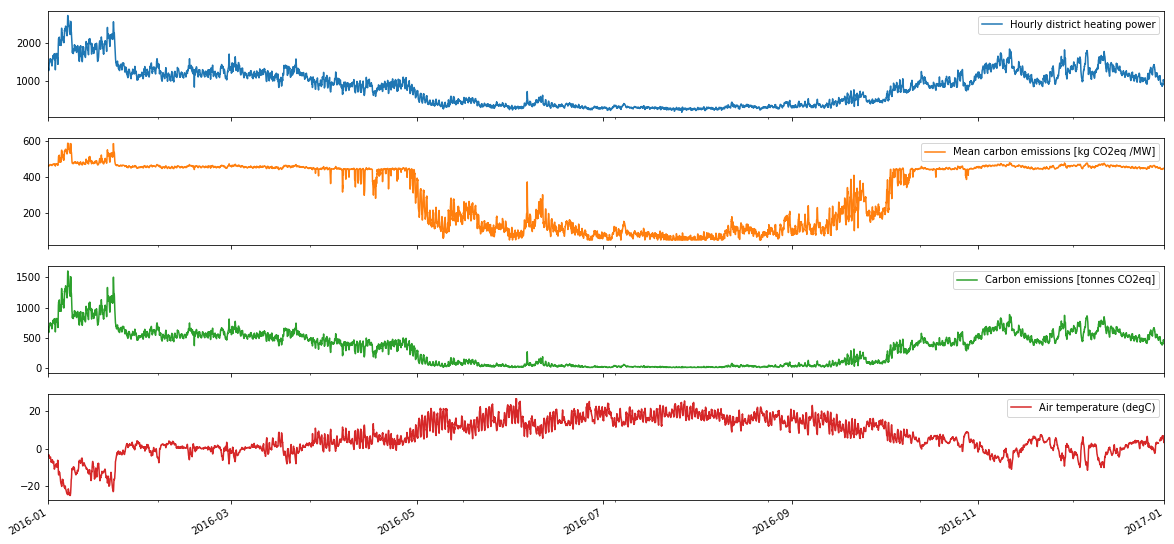

In [33]:
df_heat.plot(subplots=True, figsize=(20,10));

In [34]:
df_heat['Carbon emissions [tonnes CO2eq]'].sum()/10**6

3.021883807784363

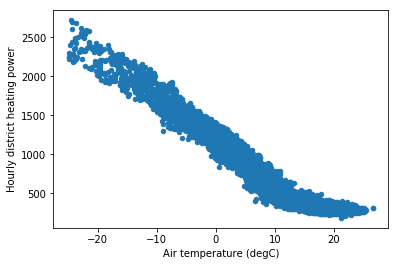

In [35]:
df_heat.plot.scatter(x='Air temperature (degC)', y='Hourly district heating power')

In [36]:
[['Air temperature (degC)', 'Hourly district heating power']]

[['Air temperature (degC)', 'Hourly district heating power']]

In [37]:
df_temp.to_csv('temp_helsinki.csv')

In [42]:
df_heat['Hourly district heating power'].sum()/10**3

7508.1505099999995